In [34]:
import os
import numpy as np 
import pandas as pd 

import seaborn as sns  
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
import missingno as msno
sns.set()

import random
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier

"""[width, height] = matplotlib.rcParams['figure.figsize']
if width < 10:
    matplotlib.rcParams['figure.figsize'] = [width * 2.5, height]"""

"[width, height] = matplotlib.rcParams['figure.figsize']\nif width < 10:\n    matplotlib.rcParams['figure.figsize'] = [width * 2.5, height]"

In [8]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
train_data = pd.read_csv('/content/gdrive/MyDrive/train.csv')
train_data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
test_data = pd.read_csv("/content/gdrive/MyDrive/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
gender_submission = pd.read_csv('/content/gdrive/MyDrive/gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


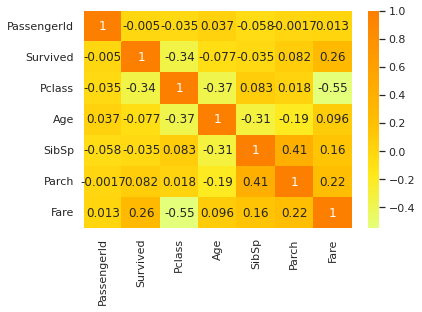

In [14]:
sns.heatmap(train_data.corr(), cmap="Wistia", annot=True)
plt.show()

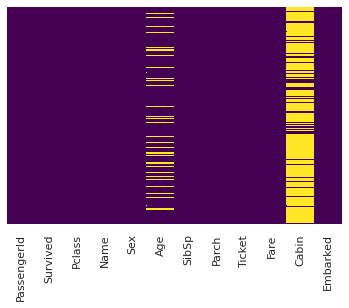

In [15]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
train_age = train_data['Age'].copy()
train_age = train_age[~train_data['Age'].isnull()] 

print(train_age.describe())


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [17]:
age_media = train_age.mean()

print(f"A idade media do Titanic foi de: {age_media:.2f} anos")

A idade media do Titanic foi de: 29.70 anos


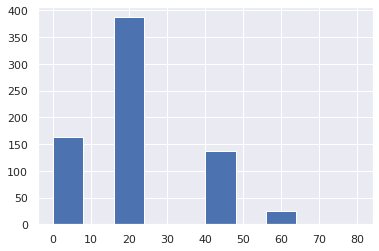

In [18]:
quant = 20
train_age = ((train_age/quant).astype(int)) * quant
train_age.hist()
plt.show()

In [19]:
train_surv = train_data['Survived'].copy()
train_surv = train_surv[~train_data['Age'].isnull()]

age_surv = []
for age in train_age.sort_values(ascending=True).unique():
  age_surv.append(sum(train_surv[train_age==age]))
  print(f'Idade: {age:.2f} \t Probabilidade de sobreviver: {sum(train_surv[train_age==age])/len(train_surv[train_age==age]):.2f}')

age_surv = pd.DataFrame( data=age_surv )[0]

Idade: 0.00 	 Probabilidade de sobreviver: 0.48
Idade: 20.00 	 Probabilidade de sobreviver: 0.39
Idade: 40.00 	 Probabilidade de sobreviver: 0.39
Idade: 60.00 	 Probabilidade de sobreviver: 0.24
Idade: 80.00 	 Probabilidade de sobreviver: 1.00


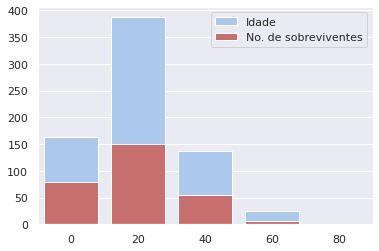

In [20]:
age = train_age.value_counts().sort_index()
sns.set_color_codes("pastel")
g=sns.barplot(x=age.index.values, y=age.values, order=age.index, color="b", label='Idade')
sns.set_color_codes("muted")
sns.barplot(x=age.index.values, y=age_surv.values, order=age.index, color="r", label='No. de sobreviventes')
plt.legend(loc=1)
plt.show()

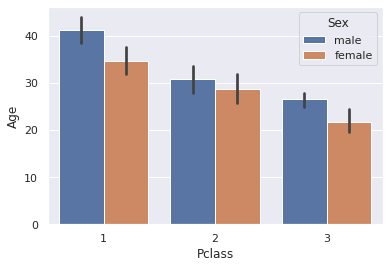

In [21]:
ax = sns.barplot(x="Pclass", y="Age", hue="Sex", data=train_data)

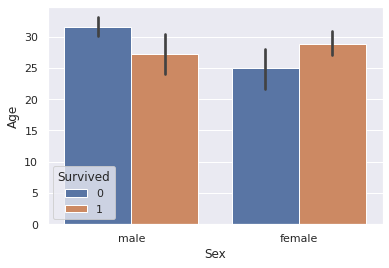

In [22]:
ax = sns.barplot(x="Sex", y="Age", hue="Survived", data=train_data)

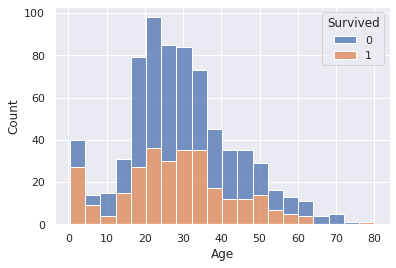

In [23]:
sns.histplot(data=train_data, x='Age', hue='Survived', multiple='stack')
plt.show()

In [24]:
age_afetada = '60-80'
age_meninos = 'Sim'

print(f"A faixa etária mais afetada foi: {age_afetada}")
print(f"Os meninos e adolescentes (0-20 anos) tiveram alguma prioridade na hora do resgate? {age_meninos}")

A faixa etária mais afetada foi: 60-80
Os meninos e adolescentes (0-20 anos) tiveram alguma prioridade na hora do resgate? Sim


In [25]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print(f"Probabilidade de sobreviver das mulheres: {rate_women:.2f}")

Probabilidade de sobreviver das mulheres: 0.74


In [26]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print(f"Probabilidade de sobreviver dos homes: {rate_men:.2f}")

Probabilidade de sobreviver dos homes: 0.19


In [27]:
sex_sobreviveu = 'Mulheres com probabilidade de 74%'

print(f"Quem sobreviveu mais no acidente, mulheres ou homens? {sex_sobreviveu}")

Quem sobreviveu mais no acidente, mulheres ou homens? Mulheres com probabilidade de 74%


In [28]:
class RandomModelClassifier():
  def __init__(self):
    pass
  def fit(self, x, y):
    pass
  def predict(sefl, x):
    y_hat = [random.random() < 0.5 for _ in range(len(x))]
    return y_hat

class NotSurvivedModelClassifier():
  def __init__(self):
    pass
  def fit(self, x, y):
    pass
  def predict(self, x):
    y_hat = [0 for _ in range(len(x))]
    return y_hat

In [29]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X, X_test = pd.get_dummies(train_data[features]), pd.get_dummies(test_data[features])

tamanho_val = 0.3

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.30, shuffle=True, random_state=0)

model_rand = RandomModelClassifier()
model_notsurvived = NotSurvivedModelClassifier()

model_rand.fit(X_train, y_train)
model_notsurvived.fit(X_train, y_train)

preditions_rand_val = model_rand.predict(X_val)
preditions_notsurvived_val = model_notsurvived.predict(X_val)

acc_rand = metrics.accuracy_score(y_val, preditions_rand_val)
acc_notsurvived = metrics.accuracy_score(y_val, preditions_notsurvived_val)

print('Accuracy do clasificador RandomModelClassifier é: ', acc_rand)
print('Accuracy do clasificador NotSurvivedModelClassifier é: ', acc_notsurvived)

Accuracy do clasificador RandomModelClassifier é:  0.4552238805970149
Accuracy do clasificador NotSurvivedModelClassifier é:  0.6268656716417911


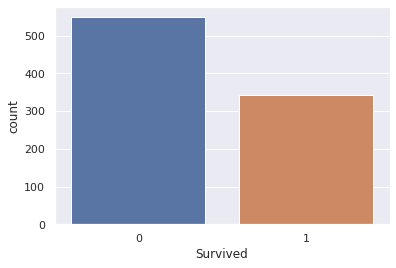

In [62]:
sns.countplot(x="Survived", data=train_data);

In [30]:
def evaluation(y, y_hat):
  acc = metrics.accuracy_score(y, y_hat)
  precision = metrics.precision_score(y, y_hat, average='weighted')
  recall = metrics.recall_score(y, y_hat, average='weighted')
  f1_score = 2*precision*recall/(precision+recall)

  return {
      'acc': acc,
      'precision': precision,
      'recall': recall,
      'f1_score': f1_score
  }

  y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

tamanho_val = 0.3

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=tamanho_val, shuffle=True, random_state=0)

model_rand = RandomModelClassifier()
model_notsurvived = NotSurvivedModelClassifier()

model_rand.fit(X_train, y_train)
model_notsurvived.fit(X_train, y_train)

preditions_rand_val = model_rand.predict(X_val)
preditions_notsurvived_val = model_notsurvived.predict(X_val)

acc_rand = evaluation(y_val, preditions_rand_val)
acc_notsurvived = evaluation(y_val, preditions_notsurvived_val)

print('Accuracy do clasificador RandomModelClassifier é: ', acc_rand)
print('Accuracy do clasificador NotSurvivedModelClassifier é: ', acc_notsurvived)

Accuracy do clasificador RandomModelClassifier é:  {'acc': 0.5149253731343284, 'precision': 0.5636225651403998, 'recall': 0.5149253731343284, 'f1_score': 0.5381746130377782}
Accuracy do clasificador NotSurvivedModelClassifier é:  {'acc': 0.6268656716417911, 'precision': 0.3929605702829138, 'recall': 0.6268656716417911, 'f1_score': 0.4830891414487198}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
mc = metrics.confusion_matrix(y_val, preditions_notsurvived_val)
print(mc)

[[168   0]
 [100   0]]


Confusion matrix, without normalization


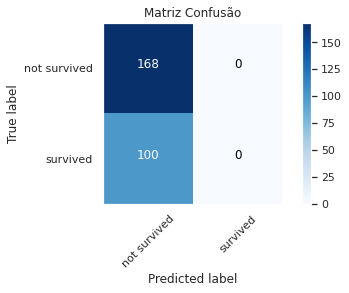

In [33]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(mc, classes=['not survived', 'survived'], title='Matriz Confusão', normalize=False)
plt.grid(False)
plt.show()

In [35]:
def evaluation(y, y_hat):
  acc = metrics.accuracy_score(y, y_hat)
  precision = metrics.precision_score(y, y_hat, average='weighted') 
  recall = metrics.recall_score(y, y_hat, average='weighted') 
  f1_score = 2*precision*recall/(precision+recall) 

  return {
      'acc': acc,
      'precision': precision,
      'recall': recall,
      'f1_score': f1_score
  }

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

tamanho_val = 0.3
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=tamanho_val, shuffle=True, random_state=0)

neighbors = [1,3,5,7,9]

evaluations = []
for k in neighbors:
  model_knn = KNeighborsClassifier(n_neighbors = k)
  model_knn.fit(X_train, y_train)
  preditions_knn_val = model_knn.predict(X_val)
  eval_knn = evaluation(y_val, preditions_knn_val)
  evaluations.append(eval_knn)

  print('Knn metrics: k=',k, 'values: ', eval_knn)

Knn metrics: k= 1 values:  {'acc': 0.746268656716418, 'precision': 0.7473458363744706, 'recall': 0.746268656716418, 'f1_score': 0.7468068581199098}
Knn metrics: k= 3 values:  {'acc': 0.7574626865671642, 'precision': 0.7541497207573605, 'recall': 0.7574626865671642, 'f1_score': 0.7558025731871473}
Knn metrics: k= 5 values:  {'acc': 0.7723880597014925, 'precision': 0.7689468645052173, 'recall': 0.7723880597014925, 'f1_score': 0.7706636206850516}
Knn metrics: k= 7 values:  {'acc': 0.7873134328358209, 'precision': 0.7928269102249944, 'recall': 0.7873134328358209, 'f1_score': 0.7900605526275505}
Knn metrics: k= 9 values:  {'acc': 0.7873134328358209, 'precision': 0.7895956693262081, 'recall': 0.7873134328358209, 'f1_score': 0.788452899557984}


In [36]:
df = pd.DataFrame(evaluations, index=neighbors)
df

,acc,precision,recall,f1_score
1,0.746269,0.747346,0.746269,0.746807
3,0.757463,0.754150,0.757463,0.755803
5,0.772388,0.768947,0.772388,0.770664
7,0.787313,0.792827,0.787313,0.790061
9,0.787313,0.789596,0.787313,0.788453


In [37]:
k=7 

model_knn = KNeighborsClassifier(n_neighbors = k)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [38]:
predictions = model_knn.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
